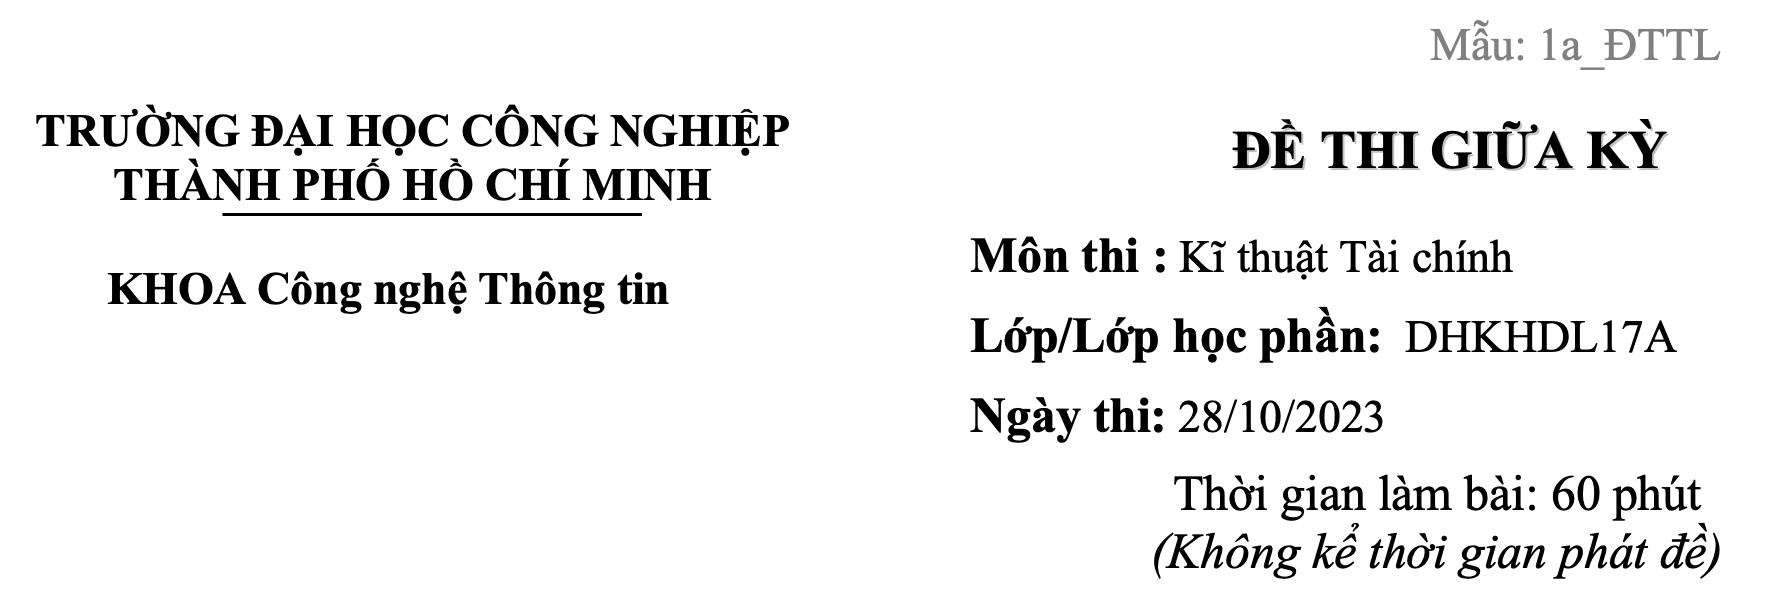

* Đổi tên file ipynb thành <mã sinh viên>_<Họ Tên>_midterm.ipynb (Ví dụ 123456_NguyenVanA_midterm.ipynb)

* Nộp file ipynb trong LMS https://lms.iuh.edu.vn/mod/assign/view.php?id=246999&forceview=1

## Họ và tên thí sinh: Nguyễn Tiến Dũng
## MSSV: 21003901

# Câu 1 (4 điểm) Modern Portfolio Theory

Tỉ suất lợi nhuận của hai risky assets là $\bar{r_1} = 10 \%$ và $\bar{r_2} = 15 \%$. Độ lệch chuẩn của hai tỉ suất lợi nhuận là $\sigma_1=20 \%$ và $\sigma_2=30 \%$. Hệ số tương quan giữa hai tỉ suất lợi nhuận là $30 \%$. 

(a) (2 điểm) Sử dụng Python, vẽ feasible set của tất cả các portfolio được xây dựng từ hai assets này trên đồ thị mean - standard deviation (Chọn $w_1 \in \left[-0.5, 1.5 \right]$). 

(b) (1 điểm) Chỉ ra trên đồ thị của câu (a) minimum variance set và efficient frontier

(c) (1 điểm) Một portfolio đầu tư $40 \%$ vào asset 1 và $60 \%$ vào asset 2. Sử dụng Python tính tỉ suất lợi nhuận trung bình và mức độ rủi ro của portfolio?


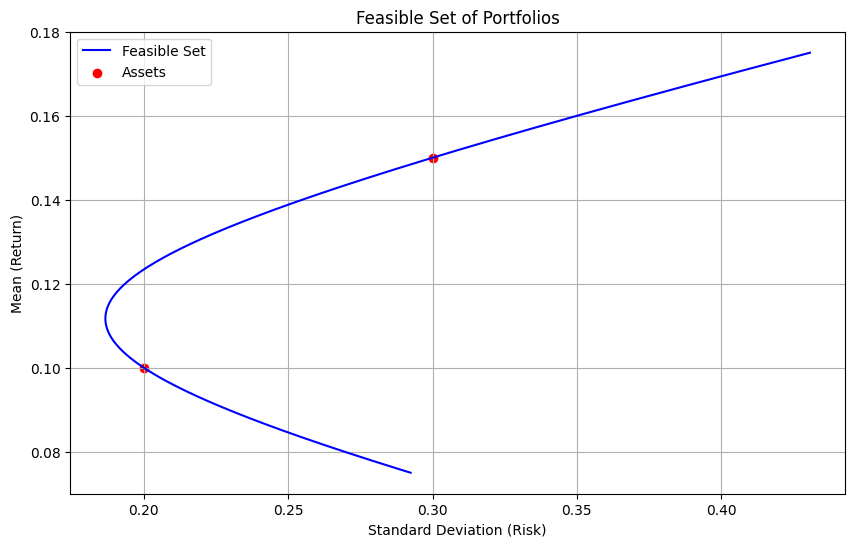

In [26]:
# Câu 1a

# Your code goes here
import numpy as np
import matplotlib.pyplot as plt

r1 = 0.10 
r2 = 0.15
sigma1 = 0.20 
sigma2 = 0.30
rho = 0.30

w1 = np.linspace(-0.5, 1.5, 500)

mean_portfolio = w1 * r1 + (1 - w1) * r2
std_portfolio = np.sqrt((w1**2) * (sigma1**2) + (1 - w1)**2 * (sigma2**2) + 2 * w1 * (1 - w1) * rho * sigma1 * sigma2)

plt.figure(figsize=(10, 6))

plt.plot(std_portfolio, mean_portfolio, label='Feasible Set', color='b')
plt.scatter([sigma1, sigma2], [r1, r2], color='r', marker='o', label='Assets')

plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Mean (Return)')
plt.title('Feasible Set of Portfolios')

plt.grid(True)
plt.legend()
plt.show()

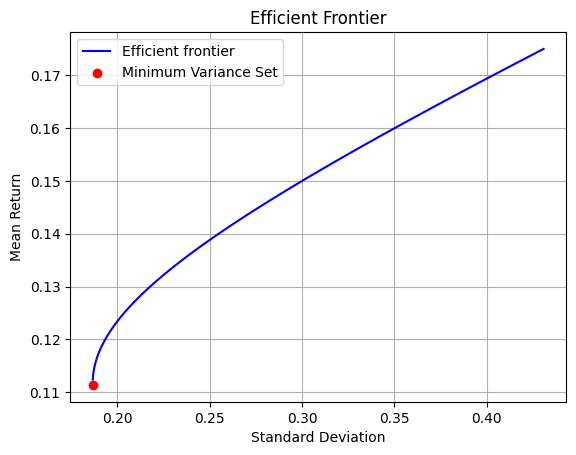

In [27]:
# Câu 1b
r1 = 0.10
r2 = 0.15
sigma1 = 0.20 
sigma2 = 0.30  
corr = 0.30 

w1 = np.linspace(-0.5, 1.5, 100) 
w2 = 1 - w1 

mean = w1 * r1 + w2 * r2 
std = np.sqrt((w1**2 * sigma1**2) + (w2**2 * sigma2**2) + (2 * w1 * w2 * sigma1 * sigma2 * corr)) 

min_var_std = np.min(std) 
min_var_mean = mean[np.argmin(std)] 

plt.plot(std[mean>min_var_mean], mean[mean>min_var_mean], label='Efficient frontier', color='blue')
plt.scatter(min_var_std, min_var_mean, color='red', label='Minimum Variance Set')
plt.xlabel('Standard Deviation')
plt.ylabel('Mean Return')
plt.title('Efficient Frontier')
plt.grid(True)
plt.legend()
plt.show()

In [28]:
# Câu 1c

# Your code goes here
w1_portfolio = 0.4
w2_portfolio = 0.6

r_portfolio = w1_portfolio * r1 + w2_portfolio * r2

sigma_portfolio = np.sqrt((w1_portfolio * sigma1)**2 + (w2_portfolio * sigma2)**2 + 2 * w1_portfolio * w2_portfolio * rho * sigma1 * sigma2)

print(f'Tỉ suất lợi nhuận trung bình của portfolio: {r_portfolio:.2%}')
print(f'Mức độ rủi ro (độ lệch chuẩn) của portfolio: {sigma_portfolio:.2%}')

Tỉ suất lợi nhuận trung bình của portfolio: 13.00%
Mức độ rủi ro (độ lệch chuẩn) của portfolio: 21.78%


## Câu 2 (3 điểm) Interest Rates

Anh Hoàng vay $2$ tỉ đồng với lãi suất $10\%$ / năm để mua nhà từ ngân hàng Awesome Bank và trả góp hàng tháng trong $20$ năm. Anh Hoàng sẽ trả một khoản trả góp hàng tháng không thay đổi trong $240$ tháng ($20$ năm). Viết code Python để trả lời các câu hỏi dưới đây

(a) (1 điểm) Viết một hàm Python `calcInstallmentPayment(amount, time, rate)` để tính số tiền trả góp hàng tháng. Sử dụng hàm này để tính số tiền trả góp hàng tháng cho anh Hoàng.

(b) (2 điểm) Viết một hàm Python `calcInterestPrincipal(amount, time, rate, month)` trả về số tiền trả lãi và số tiền trả vào tiền gốc cho mỗi tháng trả góp (Chú ý là tổng số tiền trả lãi và số tiền gốc trả hàng tháng đúng bằng số tiền trả góp hàng tháng). Sử dụng hàm này để số tiền trả lãi và số tiền trả vào tiền gốc cho mỗi tháng trả góp trong cả 240 tháng của anh Hoàng. 

In [9]:
import numpy_financial as npf
import numpy as np

In [10]:
# Câu 2a
def calcInstallmentPayment(amount, time, rate):
    """
        amount: original disbursed amount
        time: loan maturity in years
        rate: annual interest rate
        
        return installment: monthly installment
        
    
    """
    
    # Your code goes here
    monthly_rate = rate / 12
    installment = (npf.pmt(monthly_rate, time, amount)) * -1
    
    return installment
    

In [11]:
amount = 2000000000
time = 12 * 20
rate = 0.1
print(calcInstallmentPayment(amount, time, rate))

19300432.90148018


In [31]:
# Câu 2b

def calcInterestPrincipal(amount, time, rate, month):
    """
        amount: original disbursed amount
        time: loan maturity in years
        rate: annual interest rate
        month: the month we calculate the interest payment and principal payment for
        
        return installment: monthly installment
        
    
    """
    
    # Your code goes here
    monthly_rate = rate / 12
    time = 12 * month
    per = np.arange(time) + 1
    
    interest_payment = npf.ipmt(monthly_rate, per, time, amount)
    principal_payment = npf.ppmt(monthly_rate, per, time, amount)
    
    fmt1 = '{0:s} {1:s} {2:s} {3:s}'
    fmt2 = '{0:2d} {1:12.2f} {2:15.2f} {3:15.2f}'
    fmt3 = '{0:2d} {1:12.2f} {2:15.2f} {3:15.2f}'

    print(fmt1.format('Term', 'principal_payment', 'interest_payment', 'Remaining Principal'))
    print(fmt2.format(0, 0, 0, amount))

    for n in per:
        i = n - 1
        amount = amount + principal_payment[i]
        print(fmt3.format(n, principal_payment[i], interest_payment[i], amount))

In [32]:
amount = 2000000000
month = 20
time = 12 * month
rate = 0.1
print(calcInterestPrincipal(amount, time, rate, month))

Term principal_payment interest_payment Remaining Principal
 0         0.00            0.00   2000000000.00
 1  -2633766.23    -16666666.67   1997366233.77
 2  -2655714.29    -16644718.61   1994710519.48
 3  -2677845.24    -16622587.66   1992032674.24
 4  -2700160.62    -16600272.29   1989332513.62
 5  -2722661.95    -16577770.95   1986609851.67
 6  -2745350.80    -16555082.10   1983864500.86
 7  -2768228.73    -16532204.17   1981096272.14
 8  -2791297.30    -16509135.60   1978304974.84
 9  -2814558.11    -16485874.79   1975490416.73
10  -2838012.76    -16462420.14   1972652403.96
11  -2861662.87    -16438770.03   1969790741.09
12  -2885510.06    -16414922.84   1966905231.04
13  -2909555.98    -16390876.93   1963995675.06
14  -2933802.28    -16366630.63   1961061872.78
15  -2958250.63    -16342182.27   1958103622.16
16  -2982902.72    -16317530.18   1955120719.44
17  -3007760.24    -16292672.66   1952112959.20
18  -3032824.91    -16267607.99   1949080134.29
19  -3058098.45    -16242334

## Câu 3 (4 điểm) - Forwards and Futures

(a) (2 điểm) Thực hiện một function để tính forward price của một chứng khoán thuộc một trong ba loại sau
* `AssetType.NO_INCOME`: chứng khoán không trả coupons và không có dividend yield. 
* `AssetType.KNOWN_INCOME`: trả coupons hoặc cash flow rời rạc
* `AssetType.KNOWN_CONTINUOUS_YIELD`: trả dividend yield
Sử dụng continuous compounding.
I (income) được cho dưới dạng tuple của (cashflow, time). Ví dụ, cash flows của một trái phiếu với 4 coupons , mỗi coupon $5\$$ tại các thời điểm 6 tháng nữa, 1 năm nữa, 1.5 năm nữa, và 2 năm nữa sẽ được biểu diễn dưới dạng tuple $((5, 0.5), (5, 1), (5, 1.5), (5, 2))$.
Function phải kiểm tra `asset_type` của chứng khoán để sử dụng đúng công thức của $F_t$.

(b) (1 điểm) Thực hiện một function để tính giá trị tại thời điểm t của một hợp đồng forward. Sử dụng continuous compounding. Sử dụng function `calcForwardPrice()` trong phần (a) để tính $F_t$

In [5]:
from enum import Enum
 
class AssetType(Enum):
    NO_INCOME = 1
    KNOWN_INCOME = 2
    KNOWN_CONTINUOUS_YIELD = 3

In [2]:
# Câu 3a

def calcForwardPrice(S, r, t, T, I, q, asset_type):
    
    """
    S: Spot price of the asset at time t
    r: risk-free interest rate
    t: current time
    T: maturity (in years)
    I: Present value at time t of the income received in [t, T] 
    q: dividend yield
    asset_type: AssetType
    
    
    return:
    F: Forward price calculated at time t (Ft)
    """
    
    # Your code goes here
    if asset_type == AssetType.NO_INCOME:
        Ft = S * np.exp(r * (T - t))
    elif asset_type == AssetType.KNOWN_INCOME:
        Ft = (S - I) * np.exp(r * (T - t))
    elif asset_type == AssetType.KNOWN_CONTINUOUS_YIELD:
        Ft = S * np.exp((r - q) * (T - t))
    else:
        raise ValueError("Invalid asset type")
    
    return Ft

In [3]:
# Câu 3b

def calForwardValue(S, r, K, t, T, I, q, asset_type):
    
    """
    S: Spot price of the asset at time t
    r: risk-free interest rate
    t: current time
    T: maturity (in years)
    I: Present value at time t of the income received in [t, T] 
    q: dividend yield
    asset_type: AssetType
    
    
    return:
    v: Forward price calculated at time t (Ft)
    """
    
    # Your code goes here
    Ft = calcForwardPrice(S, r, t, T, I, q, asset_type)
    
    v = (Ft - K) * np.exp(-r * (T - t))
    return v